# Food Deserts in Chicago, IL
## This is an investigation into the availability of fresh produce/groceries in Chicago’s most impoverished areas and will analyze for improvement in these areas.
---

## (I) Retrieve Data (Webscraping) from ZipAtlas: Chicago Median Household Income by Zip

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
!pip install bs4
!pip install geopy
!pip install folium

In [2]:
# List of Avg Income per Household in Chicago by ZIP code from Zipatlas
url = "http://zipatlas.com/us/il/chicago/zip-code-comparison/median-household-income.htm"

In [5]:
data  = requests.get(url).text 

In [6]:
soup = BeautifulSoup(data,"html5lib")

In [7]:
# Find all tables
tables = soup.find_all('table')

In [8]:
# Count the number of tables
len(tables)

18

In [9]:
# Table #13 has the required data
pd.read_html(str(tables[13]), flavor='bs4')

[      0         1                      2                  3           4  \
 0     #  Zip Code               Location               City  Population   
 1    1.     60606  41.881988, -87.637329  Chicago, Illinois        1682   
 2    2.     60601  41.885805, -87.622911  Chicago, Illinois        5591   
 3    3.     60611  41.893024, -87.618998  Chicago, Illinois       26522   
 4    4.     60614  41.922667, -87.652537  Chicago, Illinois       65474   
 5    5.     60603  41.880614, -87.629311  Chicago, Illinois         378   
 6    6.     60655  41.694722, -87.703687  Chicago, Illinois       29138   
 7    7.     60646  41.992931, -87.760278  Chicago, Illinois       27016   
 8    8.     60605  41.857651, -87.615592  Chicago, Illinois       12423   
 9    9.     60657  41.938964, -87.656811  Chicago, Illinois       66789   
 10  10.     60631  41.994948, -87.813225  Chicago, Illinois       28832   
 11  11.     60661  41.882458, -87.643946  Chicago, Illinois        4382   
 12  12.    

In [10]:
# Convert table to a dataframe chizipraw
chizipraw = pd.read_html(str(tables[13]), flavor='bs4')[0]

chizipraw.head()

,0,1,2,3,4,5,6
0,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
1,1.,60606,"41.881988, -87.637329","Chicago, Illinois",1682,"$100,377.00",#259
2,2.,60601,"41.885805, -87.622911","Chicago, Illinois",5591,"$77,374.00",#961
3,3.,60611,"41.893024, -87.618998","Chicago, Illinois",26522,"$69,889.00","#1,558"
4,4.,60614,"41.922667, -87.652537","Chicago, Illinois",65474,"$68,324.00","#1,712"


In [11]:
# drop the header row from chizipraw and rename df to chizip
new_header = chizipraw.iloc[0] 

chizip = chizipraw[1:] 

chizip.columns = new_header

In [12]:
chizip.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
1,1.,60606,"41.881988, -87.637329","Chicago, Illinois",1682,"$100,377.00",#259
2,2.,60601,"41.885805, -87.622911","Chicago, Illinois",5591,"$77,374.00",#961
3,3.,60611,"41.893024, -87.618998","Chicago, Illinois",26522,"$69,889.00","#1,558"
4,4.,60614,"41.922667, -87.652537","Chicago, Illinois",65474,"$68,324.00","#1,712"
5,5.,60603,"41.880614, -87.629311","Chicago, Illinois",378,"$61,815.00","#2,591"


In [13]:
# drop the # column from chizip
chizip = chizip.iloc[:,[1,2,3,4,5,6]] 
chizip.head()

,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,"$100,377.00",#259
2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,"$77,374.00",#961
3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,"$69,889.00","#1,558"
4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,"$68,324.00","#1,712"
5,60603,"41.880614, -87.629311","Chicago, Illinois",378,"$61,815.00","#2,591"


In [14]:
# 55 line entries (zip codes)
chizip.shape

(55, 6)

In [15]:
chizip.dtypes

0
Zip Code              object
Location              object
City                  object
Population            object
Avg. Income/H/hold    object
National Rank         object
dtype: object

In [16]:
# Split Location into x2 columns: latitude and longitude
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in chizip['Location']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
chizip['latitude'] = lat
chizip['longitude'] = lon
chizip.head()

,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank,latitude,longitude
1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,"$100,377.00",#259,41.881988,-87.637329
2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,"$77,374.00",#961,41.885805,-87.622911
3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,"$69,889.00","#1,558",41.893024,-87.618998
4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,"$68,324.00","#1,712",41.922667,-87.652537
5,60603,"41.880614, -87.629311","Chicago, Illinois",378,"$61,815.00","#2,591",41.880614,-87.629311


In [17]:
# Drop the Location column and city column
chizip2 = chizip.iloc[:,[0,3,4,5,6,7]] 

# Rename columns: "Avg. Income/H/hold" = "Income"
# Rename datraframe to chizip2
chizip2.rename(columns = {'Avg. Income/H/hold':'Income'}, inplace = True)
chizip2.rename(columns = {'Zip Code':'ZipCode'}, inplace = True)
chizip2.head()

C:\Users\alvarezg\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ZipCode,Population,Income,National Rank,latitude,longitude
1,60606,1682,"$100,377.00",#259,41.881988,-87.637329
2,60601,5591,"$77,374.00",#961,41.885805,-87.622911
3,60611,26522,"$69,889.00","#1,558",41.893024,-87.618998
4,60614,65474,"$68,324.00","#1,712",41.922667,-87.652537
5,60603,378,"$61,815.00","#2,591",41.880614,-87.629311


## (II) Clean Data

In [18]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [19]:
# Use geopy library to get the latitude and longitude values of Chicago
address = 'Chicago'

geolocator = Nominatim(user_agent="chi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [563]:
chizip2.head()

,ZipCode,Population,Income,National Rank,latitude,longitude
1,60606,1682,100377.0,#259,41.881988,-87.637329
2,60601,5591,77374.0,#961,41.885805,-87.622911
3,60611,26522,69889.0,"#1,558",41.893024,-87.618998
4,60614,65474,68324.0,"#1,712",41.922667,-87.652537
5,60603,378,61815.0,"#2,591",41.880614,-87.629311


In [21]:
chizip2.dtypes

0
ZipCode          object
Population       object
Income           object
National Rank    object
latitude         object
longitude        object
dtype: object

In [22]:
chizip3=chizip2

In [23]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [24]:
#Convert datatypes and remove "$" and commas
chizip3['Income'] = chizip3['Income'].apply(clean_currency).astype('float')
chizip3['latitude'] = chizip3['latitude'].apply(clean_currency).astype('float')
chizip3['longitude'] = chizip3['longitude'].apply(clean_currency).astype('float')
chizip3['ZipCode'] = chizip3['ZipCode'].apply(clean_currency).astype('int')


<ipython-input-24-c1d43b1ba2cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chizip3['Income'] = chizip3['Income'].apply(clean_currency).astype('float')
<ipython-input-24-c1d43b1ba2cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chizip3['latitude'] = chizip3['latitude'].apply(clean_currency).astype('float')
<ipython-input-24-c1d43b1ba2cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [1066]:
# create map of Chicago using latitude and longitude values
map_chi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map that include Zip code & Income
for lat, lng, zipcode, income in zip(chizip3['latitude'], chizip3['longitude'], chizip3['ZipCode'], chizip3['Income']):
    label = '{}, {}'.format(zipcode, income)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chi)  
    
map_chi

## (III) K-Means Clustering: Cluster Chicago Zip Codes

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [455]:
chizip3.head()

,ZipCode,Population,Income,National Rank,latitude,longitude
1,60606,1682,100377.0,#259,41.881988,-87.637329
2,60601,5591,77374.0,#961,41.885805,-87.622911
3,60611,26522,69889.0,"#1,558",41.893024,-87.618998
4,60614,65474,68324.0,"#1,712",41.922667,-87.652537
5,60603,378,61815.0,"#2,591",41.880614,-87.629311


In [456]:
chizip3.dtypes

0
ZipCode            int32
Population        object
Income           float64
National Rank     object
latitude         float64
longitude        float64
dtype: object

In [1032]:
# drop the National Rank column from chizip
chizip4 = chizip3.iloc[:,[0,2,4,5]] 
chizip4.head()

,ZipCode,Income,latitude,longitude
1,60606,100377.0,41.881988,-87.637329
2,60601,77374.0,41.885805,-87.622911
3,60611,69889.0,41.893024,-87.618998
4,60614,68324.0,41.922667,-87.652537
5,60603,61815.0,41.880614,-87.629311


In [1031]:
# drop zero values from Income
chizip4.drop(chizip4.index[chizip4['Income'] == 0], inplace = True)
chizip4

C:\Users\alvarezg\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ZipCode,Income,latitude,longitude
1,60606,100377.0,41.881988,-87.637329
2,60601,77374.0,41.885805,-87.622911
3,60611,69889.0,41.893024,-87.618998
4,60614,68324.0,41.922667,-87.652537
5,60603,61815.0,41.880614,-87.629311
6,60655,59849.0,41.694722,-87.703687
7,60646,58232.0,41.992931,-87.760278
8,60605,56151.0,41.857651,-87.615592
9,60657,55647.0,41.938964,-87.656811
10,60631,55316.0,41.994948,-87.813225


In [1033]:
chizip4.dtypes

0
ZipCode        int32
Income       float64
latitude     float64
longitude    float64
dtype: object

In [1034]:
# Perform k-means clustering: Cluster the neighborhood into 4 clusters
kclusters = 4



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chizip4)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1035]:
# add clustering labels
chizip4.insert(0, 'Cluster Labels', kmeans.labels_)

In [1163]:
# create map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, income, cluster, zipcode in zip(chizip4['latitude'], chizip4['longitude'], chizip4['Income'], chizip4['Cluster Labels'], chizip4['ZipCode']):
    label = folium.Popup(str(income) + ' Cluster ' + str(cluster) + ' Zip ' + str(zipcode), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1164]:
map_top5=map_clusters

In [1037]:
map_clusters2=map_clusters

In [1038]:
chizip4.head()

,Cluster Labels,ZipCode,Income,latitude,longitude
1,2,60606,100377.0,41.881988,-87.637329
2,2,60601,77374.0,41.885805,-87.622911
3,2,60611,69889.0,41.893024,-87.618998
4,2,60614,68324.0,41.922667,-87.652537
5,1,60603,61815.0,41.880614,-87.629311


In [1041]:
# drop zero values from Income
chizip4.drop(chizip4.index[chizip4['Income'] == 0], inplace = True)
chizip4

C:\Users\alvarezg\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Cluster Labels,ZipCode,Income,latitude,longitude
1,2,60606,100377.0,41.881988,-87.637329
2,2,60601,77374.0,41.885805,-87.622911
3,2,60611,69889.0,41.893024,-87.618998
4,2,60614,68324.0,41.922667,-87.652537
5,1,60603,61815.0,41.880614,-87.629311
6,1,60655,59849.0,41.694722,-87.703687
7,1,60646,58232.0,41.992931,-87.760278
8,1,60605,56151.0,41.857651,-87.615592
9,1,60657,55647.0,41.938964,-87.656811
10,1,60631,55316.0,41.994948,-87.813225


In [1042]:
cluster0=chizip4[chizip4['Cluster Labels'] < 1]
cluster0.head()

,Cluster Labels,ZipCode,Income,latitude,longitude
43,0,60623,28203.0,41.847079,-87.719446
44,0,60608,28026.0,41.848647,-87.672320
45,0,60636,27727.0,41.775708,-87.669011
46,0,60649,27699.0,41.763484,-87.570411
47,0,60644,26930.0,41.880614,-87.756903


In [1043]:
#Represnetative points for clusters based on geaogrpahy knwoledge
lat1=41.885805
long1=-87.622911
lat0=41.775708
long0=-87.669011
lat3=41.992931
long3=-87.760278
lat2=41.743383
long2=-87.605811

In [1044]:
# Create a dataframe from centroids
d = {"LATI": [lat0, lat1, lat2, lat3], "LONGI": [long0, long1, long2, long3]}
df2 = pd.DataFrame(d)
print("The DataFrame ")
print(df2)


The DataFrame 
        LATI      LONGI
0  41.775708 -87.669011
1  41.885805 -87.622911
2  41.743383 -87.605811
3  41.992931 -87.760278


In [1045]:
#Add representative points to map

sample0=folium.Marker([lat0, long0], popup='<i>Zero</i>').add_to(map_clusters2)
sample1=folium.Marker([lat1, long1], popup='<i>One</i>').add_to(map_clusters2)
sample2=folium.Marker([lat2, long2], popup='<i>Two</i>').add_to(map_clusters2)
sample3=folium.Marker([lat3, long3], popup='<i>Three</i>').add_to(map_clusters2)

map_clusters2

## (IV) RETRIEVE VENUE DATA FROM FOURSQUARE

In [422]:
# Foursquare Credentdials are in a hidden cell

In [600]:
# @hidden_cell
CLIENT_ID = 'SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K' # your Foursquare ID
CLIENT_SECRET = 'WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [601]:
#Define Radius in miles
miles = 1

#Convert miles to meters
conversion_factor = 0.62137119
kilometers = miles / conversion_factor
meters = kilometers *1000

radius = meters

#define Limit = 50
LIMIT = 50

In [602]:
# URL definition for CLUSTER 0

varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat0, 
    long0, 
    radius, 
    LIMIT)
varzero # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K&client_secret=WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY&v=20180605&ll=41.775708,-87.669011&radius=1609.3440057946684&limit=50'

In [603]:
#Results for CLUSTER 0
results0 = requests.get(varzero).json()
results0

{'meta': {'code': 200, 'requestId': '60a3bf928c8bb50aea0ff2dc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'West Englewood',
  'headerFullLocation': 'West Englewood, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 54,
  'suggestedBounds': {'ne': {'lat': 41.790189014481015,
    'lng': -87.64962942236401},
   'sw': {'lat': 41.76122698551899, 'lng': -87.68839257763598}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50cf79bb498e9af66fe2bc6c',
       'name': 'Laverne Carroll Salon',
       'location': {'address': '6159 S Ashland Ave',
        'lat': 41.78139091104437,
        'lng': -87.66421771666556,
        'l

In [604]:
# URL definition for CLUSTER 1

var1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat1, 
    long1, 
    radius, 
    LIMIT)
var1 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K&client_secret=WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY&v=20180605&ll=41.885805,-87.622911&radius=1609.3440057946684&limit=50'

In [605]:
#Results for CLUSTER 1
results1 = requests.get(var1).json()
results1

{'meta': {'code': 200, 'requestId': '60a3bf93b33f0f64110a2828'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Loop',
  'headerFullLocation': 'The Loop, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 235,
  'suggestedBounds': {'ne': {'lat': 41.90028601448101,
    'lng': -87.60349605879131},
   'sw': {'lat': 41.871323985518984, 'lng': -87.6423259412087}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59ea2c436e46507344ca1aae',
       'name': 'sweetgreen',
       'location': {'address': '150 N Michigan Ave',
        'crossStreet': 'Randolph',
        'lat': 41.8849641,
        'lng': -87.6247284,
        'lab

In [606]:
# URL definition for CLUSTER 2

var2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat2, 
    long2, 
    radius, 
    LIMIT)
var2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K&client_secret=WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY&v=20180605&ll=41.743383,-87.605811&radius=1609.3440057946684&limit=50'

In [607]:
#Results for CLUSTER 2
results2 = requests.get(var2).json()
results2

{'meta': {'code': 200, 'requestId': '60a3bf94499626724f45f00b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Chatham',
  'headerFullLocation': 'Chatham, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 60,
  'suggestedBounds': {'ne': {'lat': 41.757864014481015,
    'lng': -87.58643918273087},
   'sw': {'lat': 41.72890198551899, 'lng': -87.62518281726913}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b876c65f964a520e2be31e3',
       'name': 'Dat Donut',
       'location': {'address': '8249 S Cottage Grove Ave',
        'crossStreet': 'at E. 83rd St.',
        'lat': 41.74411303511134,
        'lng': -87.60481

In [608]:
# URL definition for CLUSTER 3

var3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat3, 
    long3, 
    radius, 
    LIMIT)
var3 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K&client_secret=WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY&v=20180605&ll=41.992931,-87.760278&radius=1609.3440057946684&limit=50'

In [609]:
#Results for CLUSTER 3
results3 = requests.get(var3).json()
results3

{'meta': {'code': 200, 'requestId': '60a3bf958e03f54a67e8547d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Edgebrook',
  'headerFullLocation': 'Edgebrook, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 59,
  'suggestedBounds': {'ne': {'lat': 42.00741201448101,
    'lng': -87.74083041605859},
   'sw': {'lat': 41.978449985518985, 'lng': -87.77972558394141}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c0304c139d476b0bb932fa7',
       'name': 'Chocolate Shoppe Ice Cream',
       'location': {'address': '5337 W Devon Ave',
        'lat': 41.9972002008362,
        'lng': -87.76255362647106,
        'labeledLa

In [610]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [611]:
#CLUSTER 0 TABLE OF VENUES
# Put the json into a pandas df - nearby_venues
venues = results0['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-611-4721aa639da0>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
3,Ogden Park,Park,41.775346,-87.655249
4,Sexty Sex Cocktail Lounge,Lounge,41.773739,-87.683387


In [612]:
#CLUSTER 1 TABLE OF VENUES
# Put the json into a pandas df - nearby_venues
venues1 = results1['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues1

<ipython-input-612-d538f6fa7ec3>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues1 = json_normalize(venues1) # flatten JSON


,name,categories,lat,lng
0,sweetgreen,Salad Place,41.884964,-87.624728
1,Roti Modern Mediterranean,Mediterranean Restaurant,41.886048,-87.624948
2,Wildberry Pancakes & Cafe,Breakfast Spot,41.884412,-87.623047
3,Chicago Architecture Center,Tour Provider,41.887720,-87.623650
4,Virgin Hotels Chicago,Hotel,41.886065,-87.625853
5,St. Jane Chicago,Hotel,41.886573,-87.624902
6,Giordano's,Pizza Place,41.885130,-87.623761
7,Chicago Cultural Center,Museum,41.883640,-87.624671
8,"LondonHouse Chicago, Curio Collection by Hilton",Hotel,41.887832,-87.625426
9,Intelligentsia Coffee,Coffee Shop,41.884517,-87.625783


In [613]:
#CLUSTER 2 TABLE OF VENUES
# Put the json into a pandas df - nearby_venues
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues2

<ipython-input-613-c7058c582470>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues2 = json_normalize(venues2) # flatten JSON


,name,categories,lat,lng
0,Dat Donut,Donut Shop,41.744113,-87.604816
1,Garrett Popcorn Shops,Snack Place,41.736535,-87.605829
2,Uncle Johns Barbeque,BBQ Joint,41.744203,-87.604915
3,City Life Cocktail Lounge,Lounge,41.744136,-87.606876
4,Tropical Island Delight,African Restaurant,41.751125,-87.610441
5,Walgreens,Pharmacy,41.738138,-87.605557
6,Licorice,Bar,41.736525,-87.609361
7,Lil's Something Cool,Lounge,41.748723,-87.605251
8,Harold's Chicken Shack,Fried Chicken Joint,41.750918,-87.604819
9,Dunkin',Donut Shop,41.736741,-87.612562


In [614]:
#CLUSTER 3 TABLE OF VENUES
# Put the json into a pandas df - nearby_venues
venues3 = results3['response']['groups'][0]['items']
    
nearby_venues3 = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues3 =nearby_venues3.loc[:, filtered_columns]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues3.head()

<ipython-input-614-dd142e4811b7>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues3 = json_normalize(venues3) # flatten JSON


,name,categories,lat,lng
0,Chocolate Shoppe Ice Cream,Ice Cream Shop,41.997200,-87.762554
1,The Elephant Thai Cuisine,Thai Restaurant,41.997477,-87.762537
2,Edgebrook Woods,Park,41.990031,-87.765746
3,Caldwell Woods Bicycle Trail (North Branch Trail),Trail,41.997523,-87.767365
4,King Pho Restaurant,Vietnamese Restaurant,41.997480,-87.764492


In [615]:
# Count of number of venues returned by Foursquare
print('{} venues were returned by Foursquare for CLUSTER 0.'.format(nearby_venues.shape[0]))
print('{} venues were returned by Foursquare for CLUSTER 1.'.format(nearby_venues1.shape[0]))
print('{} venues were returned by Foursquare for CLUSTER 2.'.format(nearby_venues2.shape[0]))
print('{} venues were returned by Foursquare for CLUSTER 3.'.format(nearby_venues3.shape[0]))

50 venues were returned by Foursquare for CLUSTER 0.
50 venues were returned by Foursquare for CLUSTER 1.
50 venues were returned by Foursquare for CLUSTER 2.
50 venues were returned by Foursquare for CLUSTER 3.


In [616]:
# add clustering labels
nearby_venues.insert(0, 'Cluster Label', 0)
nearby_venues1.insert(0, 'Cluster Label', 1)
nearby_venues2.insert(0, 'Cluster Label', 2)
nearby_venues3.insert(0, 'Cluster Label', 3)
nearby_venues.head()

,Cluster Label,name,categories,lat,lng
0,0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,0,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,0,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
3,0,Ogden Park,Park,41.775346,-87.655249
4,0,Sexty Sex Cocktail Lounge,Lounge,41.773739,-87.683387


In [617]:
#Combine all x4 dataframes into a single dataframe
chivenues = pd.concat([nearby_venues, nearby_venues1, nearby_venues2, nearby_venues3], axis=0)

In [618]:
chivenues

,Cluster Label,name,categories,lat,lng
0,0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,0,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,0,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
3,0,Ogden Park,Park,41.775346,-87.655249
4,0,Sexty Sex Cocktail Lounge,Lounge,41.773739,-87.683387
5,0,Dunkin',Donut Shop,41.787441,-87.665141
6,0,Subway,Sandwich Place,41.768298,-87.664869
7,0,Dollar General,Discount Store,41.772408,-87.683087
8,0,GameStop,Video Game Store,41.767708,-87.664589
9,0,Dollar Tree,Discount Store,41.780853,-87.684050


In [619]:
#One Hot encoding grouping all CLUSTERS and summarizing Venue Category Counts
# one hot encoding
chi_onehot = pd.get_dummies(chivenues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chi_onehot['ClusterLabel'] = chivenues['Cluster Label'] 

# define a list of column names
cols = chi_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('ClusterLabel')))
cols

#then use .reindex() function to reorder
chi_onehot = chi_onehot.reindex(columns= cols)

#check result
chi_onehot

,ClusterLabel,African Restaurant,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Beer Garden,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Food,Food & Drink Shop,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Harbor / Marina,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Jazz Club,Kids Store,Laundromat,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Museum,Music Venue,New American Restaurant,Optical Shop,Outdoor Sculpture,Park,Pharmacy,Pizza Place,Playground,Plaza,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Thai Restaurant,Theater,Tour Provider,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [620]:
#Group VENUES AVG COUNT by CLUSTER
chi_grouped = chi_onehot.groupby('ClusterLabel').mean().reset_index()
chi_grouped

,ClusterLabel,African Restaurant,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Beer Garden,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Food,Food & Drink Shop,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Harbor / Marina,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Jazz Club,Kids Store,Laundromat,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Museum,Music Venue,New American Restaurant,Optical Shop,Outdoor Sculpture,Park,Pharmacy,Pizza Place,Playground,Plaza,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Thai Restaurant,Theater,Tour Provider,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Women's Store
0,0,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.10,0.00,0.06,0.00,0.00,0.00,0.16,0.02,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.04,0.04,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.02,0.02,0.00,0.00,0.16,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.02,0.02,0.00,0.02,0.06,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00
2,2,0.04,0.02,0.00,0.00,0.02,0.02,0.02,0.04,0.00,0.00,0.00,0.02,0.02,0.04,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.04,0.00,0.00,0.00,0.06,0.00,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.06,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.04,0.02,0.00,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.02
3,3,0.00,0.06,0.00,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.02,0.02,0.00,0.06,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.04,0.02,0.06,0.00,0.02,0.02,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.02,0.00,0.06,0.00,0.00,0.02,0.02,0.02,0.00,0.02,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.02,0.02,0.00,0.00,0.02,0.00,0.00


In [621]:
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [622]:
# new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ClusterLabel']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['ClusterLabel'] = chi_grouped['ClusterLabel']

for ind in np.arange(chi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,ClusterLabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Fast Food Restaurant,Discount Store,Donut Shop,Grocery Store,Bank,Sandwich Place,Fried Chicken Joint,Cosmetics Shop,Seafood Restaurant,Gas Station
1,1,Hotel,Park,Bar,Mediterranean Restaurant,Gastropub,Theater,Pizza Place,Salad Place,Chocolate Shop,Coffee Shop
2,2,Sandwich Place,Fast Food Restaurant,Lounge,Discount Store,Chinese Restaurant,Caribbean Restaurant,Mexican Restaurant,Seafood Restaurant,Donut Shop,African Restaurant
3,3,American Restaurant,Grocery Store,Park,Fast Food Restaurant,Golf Course,Salon / Barbershop,Sandwich Place,Coffee Shop,Mexican Restaurant,Playground


In [623]:
#Group VENUES SUM by CLUSTER
chi_grouped2 = chi_onehot.groupby('ClusterLabel').sum().reset_index()
chi_grouped2

,ClusterLabel,African Restaurant,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,BBQ Joint,Bank,Bar,Beer Garden,Boat or Ferry,Breakfast Spot,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Food,Food & Drink Shop,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Harbor / Marina,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Jazz Club,Kids Store,Laundromat,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Museum,Music Venue,New American Restaurant,Optical Shop,Outdoor Sculpture,Park,Pharmacy,Pizza Place,Playground,Plaza,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Thai Restaurant,Theater,Tour Provider,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Women's Store
0,0,0,2,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,1,2,0,0,5,0,3,0,0,0,8,1,0,0,2,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0
1,1,0,0,1,0,0,0,0,2,1,1,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,2,0,0,1,1,0,0,8,1,0,0,1,0,0,0,0,0,0,0,2,0,0,1,1,1,0,1,3,0,2,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,2,1,1,0,0,0,0,1,0
2,2,2,1,0,0,1,1,1,2,0,0,0,1,1,2,3,0,0,0,0,0,0,0,3,0,2,0,0,0,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,3,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,2,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,3,0,3,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,3,0,0,0,0,1,0,1,0,2,1,3,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,3,0,0,1,1,1,0,1,0,2,2,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [624]:
#TOT GROCERY STORES PER CLUSTER
chi_groc=chi_grouped2[['Grocery Store']]
chi_groc

,Grocery Store
0,2
1,1
2,0
3,3


## (v) QUICK TEST INCREASE RADIUS = 2 mls

In [625]:
#Cluster 0 venues
nearby_venues.head()

,Cluster Label,name,categories,lat,lng
0,0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,0,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,0,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
3,0,Ogden Park,Park,41.775346,-87.655249
4,0,Sexty Sex Cocktail Lounge,Lounge,41.773739,-87.683387


In [626]:
# URL definition for CLUSTER 0 at an increased radius of 3218.69m (2 miles)
radius2=3218.69

varzero2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat0, 
    long0, 
    radius2, 
    LIMIT)
varzero2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SOWR5L3UORJ5QVS5HANXJLPTOBAXKCSBP5GOT23LBVIUUG1K&client_secret=WQDL3KRGQ0TXRQAHIWU0VOJAIZFQBP0SNYB3GJTE5GGWJOJY&v=20180605&ll=41.775708,-87.669011&radius=3218.69&limit=50'

In [627]:
#Results for CLUSTER 0 at an increased radius of 3218.69m (2 miles)
results20 = requests.get(varzero2).json()
results20

{'meta': {'code': 200, 'requestId': '60a3bf976786ff2290af3697'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chicago',
  'headerFullLocation': 'Chicago',
  'headerLocationGranularity': 'city',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 41.80467002896203,
    'lng': -87.63024784472805},
   'sw': {'lat': 41.746745971037974, 'lng': -87.70777415527195}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50cf79bb498e9af66fe2bc6c',
       'name': 'Laverne Carroll Salon',
       'location': {'address': '6159 S Ashland Ave',
        'lat': 41.78139091104437,
        'lng': -87.66421771666556,
        'labeledLatLngs': [{'label': 'dis

In [629]:
#CLUSTER 2 TABLE OF VENUES with INCREASED RADIUS (2 miles)
# Put the json into a pandas df - nearby_venues
venues20 = results20['response']['groups'][0]['items']
    
nearby_venues20 = json_normalize(venues20) # flatten JSON

# filter columns
filtered_columns20 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues20 =nearby_venues20.loc[:, filtered_columns]

# filter the category for each row
nearby_venues20['venue.categories'] = nearby_venues20.apply(get_category_type, axis=1)

# clean columns
nearby_venues20.columns = [col.split(".")[-1] for col in nearby_venues20.columns]

nearby_venues20.head()

<ipython-input-629-596947a032bb>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues20 = json_normalize(venues20) # flatten JSON


,name,categories,lat,lng
0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,Kusanya Cafe,Café,41.768719,-87.645680
3,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
4,Ogden Park,Park,41.775346,-87.655249


In [630]:
#TOT GROCERY STORES IN CLUSTER 0 WITH INCREASED RADIUS = 2 MILES
subset=nearby_venues20[nearby_venues20["categories"]=="Grocery Store"]
column_count=subset.count()
column_count


name          3
categories    3
lat           3
lng           3
dtype: int64

In [631]:
nearby_venues20

,name,categories,lat,lng
0,Laverne Carroll Salon,Cosmetics Shop,41.781391,-87.664218
1,Garifuna Flava - A Taste of Belize,Caribbean Restaurant,41.779359,-87.686926
2,Kusanya Cafe,Café,41.768719,-87.645680
3,Nick's Gyros,Fast Food Restaurant,41.779187,-87.674691
4,Ogden Park,Park,41.775346,-87.655249
5,Chipotle Mexican Grill,Mexican Restaurant,41.779984,-87.645117
6,Whole Foods Market,Grocery Store,41.780582,-87.646404
7,Starbucks,Coffee Shop,41.780105,-87.645148
8,Sexty Sex Cocktail Lounge,Lounge,41.773739,-87.683387
9,Dunkin',Donut Shop,41.787441,-87.665141


In [1131]:
#test

## (VI) Analysis of Bottom 5 Most Impoverished Areas in Chicago

In [1046]:
#  x5 most impoversihed areas in Chicago
cluster0.tail(5)

,Cluster Labels,ZipCode,Income,latitude,longitude
50,0,60602,23750.0,41.883067,-87.629187
51,0,60637,23228.0,41.780673,-87.603500
52,0,60624,22426.0,41.880048,-87.722352
53,0,60621,19718.0,41.776404,-87.640058
54,0,60653,14205.0,41.819722,-87.611809


In [1047]:
cluster0tail=cluster0.tail(5)

In [1048]:
#Coordinates for x5 most impoverished areas in Chicago
lat50=41.883067
long50=-87.629187
lat51=41.780673
long51=-87.603500
lat52=41.880048
long52=-87.722352
lat53=41.776404
long53=-87.640058
lat54=41.819722
long54=-87.611809

In [1050]:
#For LINE50
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat50, 
    long50, 
    radius, 
    LIMIT)
#varzero # display URL
results50 = requests.get(varzero).json()

In [1051]:
#For LINE51
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat51, 
    long51, 
    radius, 
    LIMIT)
#varzero # display URL
results51 = requests.get(varzero).json()

In [1052]:
#For LINE52
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat52, 
    long52, 
    radius, 
    LIMIT)
#varzero # display URL
results52 = requests.get(varzero).json()

In [1053]:
#For LINE53
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat53, 
    long53, 
    radius, 
    LIMIT)
#varzero # display URL
results53 = requests.get(varzero).json()

In [1054]:
#For LINE54
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat54, 
    long54, 
    radius, 
    LIMIT)
#varzero # display URL
results54 = requests.get(varzero).json()

In [1055]:
#LINE50 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues50 = results50['response']['groups'][0]['items']
    
nearby_venues50 = json_normalize(venues50) # flatten JSON

# filter columns
filtered_columns50 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues50 =nearby_venues50.loc[:, filtered_columns]

# filter the category for each row
nearby_venues50['venue.categories'] = nearby_venues50.apply(get_category_type, axis=1)

# clean columns
nearby_venues50.columns = [col.split(".")[-1] for col in nearby_venues50.columns]

#Add Zip Number back in
nearby_venues50.insert(0, 'Zip', 60602)

nearby_venues50.head()

<ipython-input-1055-19ba0dabba4d>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues50 = json_normalize(venues50) # flatten JSON


,Zip,name,categories,lat,lng
0,60602,James M. Nederlander Theatre,Theater,41.884416,-87.628861
1,60602,The Dearborn,Gastropub,41.884415,-87.629554
2,60602,Lakefront Trail,Trail,41.883470,-87.625750
3,60602,Gene Siskel Film Center,Indie Movie Theater,41.885007,-87.627916
4,60602,Daley Plaza Picasso,Public Art,41.883493,-87.629811


In [1056]:
#LINE51 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues51 = results51['response']['groups'][0]['items']
    
nearby_venues51 = json_normalize(venues51) # flatten JSON

# filter columns
filtered_columns51 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues51 =nearby_venues51.loc[:, filtered_columns]

# filter the category for each row
nearby_venues51['venue.categories'] = nearby_venues51.apply(get_category_type, axis=1)

# clean columns
nearby_venues51.columns = [col.split(".")[-1] for col in nearby_venues51.columns]

#Add Zip Number back in
nearby_venues51.insert(0, 'Zip', 60637)

nearby_venues51.head()

<ipython-input-1056-3925e869f7eb>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues51 = json_normalize(venues51) # flatten JSON


,Zip,name,categories,lat,lng
0,60637,Daley's Restaurant,Diner,41.780399,-87.605472
1,60637,Robust Coffee Lounge,Coffee Shop,41.780358,-87.596387
2,60637,Reva and David Logan Center for the Arts,College Arts Building,41.785736,-87.603576
3,60637,Jamaica Jerk Spice,Caribbean Restaurant,41.776614,-87.606249
4,60637,Harris Park,Park,41.781663,-87.604749


In [1057]:
#LINE52 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues52 = results52['response']['groups'][0]['items']
    
nearby_venues52 = json_normalize(venues52) # flatten JSON

# filter columns
filtered_columns52 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues52 =nearby_venues52.loc[:, filtered_columns]

# filter the category for each row
nearby_venues52['venue.categories'] = nearby_venues52.apply(get_category_type, axis=1)

# clean columns
nearby_venues52.columns = [col.split(".")[-1] for col in nearby_venues52.columns]

#Add Zip Number back in
nearby_venues52.insert(0, 'Zip', 60624)

nearby_venues52.head()

<ipython-input-1057-f08351450e88>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues52 = json_normalize(venues52) # flatten JSON


,Zip,name,categories,lat,lng
0,60624,Garfield Park Conservatory,Garden,41.886259,-87.717177
1,60624,Inspiration Kitchens,Food,41.884975,-87.714141
2,60624,Jerk Taco Man,Caribbean Restaurant,41.876706,-87.725672
3,60624,The Original Maxwell Street,Fast Food Restaurant,41.873355,-87.720791
4,60624,The Sky Box,Sports Bar,41.873429,-87.715747


In [1058]:
#LINE53 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues53 = results53['response']['groups'][0]['items']
    
nearby_venues53 = json_normalize(venues53) # flatten JSON

# filter columns
filtered_columns53 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues53 =nearby_venues53.loc[:, filtered_columns]

# filter the category for each row
nearby_venues53['venue.categories'] = nearby_venues53.apply(get_category_type, axis=1)

# clean columns
nearby_venues53.columns = [col.split(".")[-1] for col in nearby_venues53.columns]

#Add Zip Number back in
nearby_venues53.insert(0, 'Zip', 60621)

nearby_venues53.head()

<ipython-input-1058-2dfa1ea8a31a>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues53 = json_normalize(venues53) # flatten JSON


,Zip,name,categories,lat,lng
0,60621,Kusanya Cafe,Café,41.768719,-87.645680
1,60621,Chipotle Mexican Grill,Mexican Restaurant,41.779984,-87.645117
2,60621,Starbucks,Coffee Shop,41.780105,-87.645148
3,60621,Whole Foods Market,Grocery Store,41.780582,-87.646404
4,60621,Walgreens,Pharmacy,41.780053,-87.641949


In [1059]:
#LINE54 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues54 = results54['response']['groups'][0]['items']
    
nearby_venues54 = json_normalize(venues54) # flatten JSON

# filter columns
filtered_columns54 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues54 =nearby_venues54.loc[:, filtered_columns]

# filter the category for each row
nearby_venues54['venue.categories'] = nearby_venues54.apply(get_category_type, axis=1)

# clean columns
nearby_venues54.columns = [col.split(".")[-1] for col in nearby_venues54.columns]

#Add Zip Number back in
nearby_venues54.insert(0, 'Zip', 60653)

nearby_venues54.head()

<ipython-input-1059-17c311951a01>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues54 = json_normalize(venues54) # flatten JSON


,Zip,name,categories,lat,lng
0,60653,Ain't She Sweet Cafe,Coffee Shop,41.816817,-87.613004
1,60653,Sip & Savor,Coffee Shop,41.816817,-87.612876
2,60653,Mariano's Fresh Market,Grocery Store,41.824594,-87.616070
3,60653,Some Like It Black Creative Arts Bar,Juice Bar,41.818432,-87.605251
4,60653,Just Turkey Restaurant,BBQ Joint,41.815248,-87.606212


Merge Tables

In [1060]:
#Combine all x4 dataframes into a single dataframe
chivenuescluster0 = pd.concat([nearby_venues50, nearby_venues51, nearby_venues52, nearby_venues53, nearby_venues54], axis=0)
chivenuescluster0.head()

,Zip,name,categories,lat,lng
0,60602,James M. Nederlander Theatre,Theater,41.884416,-87.628861
1,60602,The Dearborn,Gastropub,41.884415,-87.629554
2,60602,Lakefront Trail,Trail,41.883470,-87.625750
3,60602,Gene Siskel Film Center,Indie Movie Theater,41.885007,-87.627916
4,60602,Daley Plaza Picasso,Public Art,41.883493,-87.629811


In [883]:
chivenuescluster0

,Zip,name,categories,lat,lng
0,60602,James M. Nederlander Theatre,Theater,41.884416,-87.628861
1,60602,The Dearborn,Gastropub,41.884415,-87.629554
2,60602,Lakefront Trail,Trail,41.883470,-87.625750
3,60602,Gene Siskel Film Center,Indie Movie Theater,41.885007,-87.627916
4,60602,Daley Plaza Picasso,Public Art,41.883493,-87.629811
5,60602,sweetgreen,Salad Place,41.882201,-87.629057
6,60602,The Chicago Theatre,Theater,41.885539,-87.627151
7,60602,Blick Art Materials,Arts & Crafts Store,41.880913,-87.628151
8,60602,Iwan Ries & Co,Smoke Shop,41.881591,-87.626148
9,60602,Kimpton Gray Hotel,Hotel,41.880875,-87.631752


In [1061]:
#ndf=chivenuescluster0('categories'=="Grocery Store")
newdf = chivenuescluster0[(chivenuescluster0.categories == "Grocery Store")]
newdf

,Zip,name,categories,lat,lng
27,60637,ALDI,Grocery Store,41.774518,-87.605391
39,60637,Save-A-Lot,Grocery Store,41.780314,-87.616745
16,60624,Save-A-Lot,Grocery Store,41.874619,-87.725898
3,60621,Whole Foods Market,Grocery Store,41.780582,-87.646404
2,60653,Mariano's Fresh Market,Grocery Store,41.824594,-87.616070


In [1068]:
map_chi0grocstores = map_clusters

In [1069]:
map_chi0grocstores

In [1070]:
store606371=folium.Marker([41.774518, -87.605391], popup='<i>Store60637</i>').add_to(map_chi0grocstores)
store606372=folium.Marker([41.780314, -87.616745], popup='<i>Store60637</i>').add_to(map_chi0grocstores)
store60624=folium.Marker([41.874619, -87.725898], popup='<i>Store60624</i>').add_to(map_chi0grocstores)
store60621=folium.Marker([41.780582, -87.646404], popup='<i>Store60621</i>').add_to(map_chi0grocstores)
store60653=folium.Marker([41.824594, -87.616070], popup='<i>Store60653</i>').add_to(map_chi0grocstores)

In [1071]:
sample50=folium.Circle([lat50, long50], radius = 1610, popup='Testsite60602').add_to(map_chi0grocstores)
sample51=folium.Circle([lat51, long51], radius = 1610, popup='Testsite60637').add_to(map_chi0grocstores)
sample52=folium.Circle([lat52, long52], radius = 1610, popup='Testsite60624').add_to(map_chi0grocstores)
sample53=folium.Circle([lat53, long53], radius = 1610, popup='Testsite60621').add_to(map_chi0grocstores)
sample54=folium.Circle([lat54, long54], radius = 1610, popup='Testsite60653').add_to(map_chi0grocstores)

map_chi0grocstores

In [1072]:
newdf

,Zip,name,categories,lat,lng
27,60637,ALDI,Grocery Store,41.774518,-87.605391
39,60637,Save-A-Lot,Grocery Store,41.780314,-87.616745
16,60624,Save-A-Lot,Grocery Store,41.874619,-87.725898
3,60621,Whole Foods Market,Grocery Store,41.780582,-87.646404
2,60653,Mariano's Fresh Market,Grocery Store,41.824594,-87.616070


In [1073]:
#df['index_col'] = df.index
newdf2.reset_index(level=0, inplace=True)
newdf2

,index,Zip,name,categories,lat,lng
0,0,60621,1,1,1,1
1,1,60624,1,1,1,1
2,2,60637,2,2,2,2
3,3,60653,1,1,1,1


In [989]:
xbar=newdf2.iloc[: , 0]
xbar

0    60621
1    60624
2    60637
3    60653
Name: Zip, dtype: int64

In [985]:
ybar=newdf2.iloc[:,1]
ybar

0    1
1    1
2    2
3    1
Name: name, dtype: int64

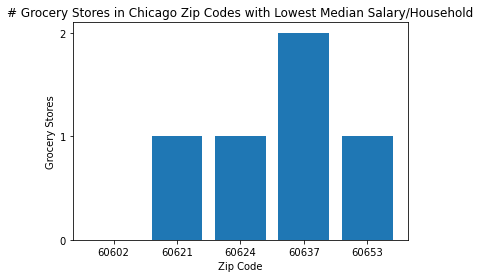

In [1171]:

   
xbar2=['60602','60621','60624','60637','60653']
ybar2=['0','1','1','2','1']
plt.bar(xbar2, ybar2)
plt.title('# Grocery Stores in Chicago Zip Codes with Lowest Median Salary/Household')
plt.xlabel('Zip Code')
plt.ylabel('Grocery Stores')
plt.show()

In [1104]:
bottom5=cluster0.tail()
bottom5

,Cluster Labels,ZipCode,Income,latitude,longitude
50,0,60602,23750.0,41.883067,-87.629187
51,0,60637,23228.0,41.780673,-87.603500
52,0,60624,22426.0,41.880048,-87.722352
53,0,60621,19718.0,41.776404,-87.640058
54,0,60653,14205.0,41.819722,-87.611809


In [1101]:
Totpop=2878552
perc50=(70/Totpop)*100
perc51=(57090/Totpop)*100
perc52=(45647/Totpop)*100
perc53=(47514/Totpop)*100
perc54=(34502/Totpop)*100

In [1105]:
#Add Zip Number back in
bottom5.insert(5, 'Pop', [70,57090,45647,47514,34502])


In [1107]:
bottom5.insert(6, "%of Tot Pop", [perc50,perc51,perc52,perc53,perc54])

In [1108]:
bottom5

,Cluster Labels,ZipCode,Income,latitude,longitude,Pop,%of Tot Pop
50,0,60602,23750.0,41.883067,-87.629187,70,0.002432
51,0,60637,23228.0,41.780673,-87.603500,57090,1.983289
52,0,60624,22426.0,41.880048,-87.722352,45647,1.585763
53,0,60621,19718.0,41.776404,-87.640058,47514,1.650622
54,0,60653,14205.0,41.819722,-87.611809,34502,1.198589


In [1111]:
chivenuescluster0.head()

,Zip,name,categories,lat,lng
0,60602,James M. Nederlander Theatre,Theater,41.884416,-87.628861
1,60602,The Dearborn,Gastropub,41.884415,-87.629554
2,60602,Lakefront Trail,Trail,41.883470,-87.625750
3,60602,Gene Siskel Film Center,Indie Movie Theater,41.885007,-87.627916
4,60602,Daley Plaza Picasso,Public Art,41.883493,-87.629811


In [1113]:
#One Hot encoding grouping all CLUSTERS and summarizing Venue Category Counts
# one hot encoding
chi_onehot2 = pd.get_dummies(chivenuescluster0[['categories']], prefix="", prefix_sep="")

# add zip column back to dataframe
chi_onehot2['Zip'] = chivenuescluster0['Zip'] 

# define a list of column names
cols2 = chi_onehot2.columns.tolist()
cols2

# move the column name to the beggining
cols2.insert(0, cols2.pop(cols2.index('Zip')))
cols2

#then use .reindex() function to reorder
chi_onehot2 = chi_onehot2.reindex(columns= cols2)

#check result
chi_onehot2

,Zip,ATM,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Botanical Garden,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Line,Business Service,Café,Caribbean Restaurant,Church,Clothing Store,Coffee Shop,College Arts Building,College Quad,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Food,Food Court,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,Grocery Store,Gym,Hardware Store,Historic Site,History Museum,Hotel,Indie Movie Theater,Jazz Club,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Museum,Music Venue,New American Restaurant,Noodle House,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Pub,Public Art,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sports Bar,Steakhouse,Supermarket,Taco Place,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Waterfront,Wings Joint
0,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,60602,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,60602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1127]:
#Group VENUES AVG COUNT by ZIP
chi_grouped2 = chi_onehot2.groupby('Zip').mean().reset_index()
chi_grouped2

,Zip,ATM,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Botanical Garden,Breakfast Spot,Bubble Tea Shop,Burrito Place,Bus Line,Business Service,Café,Caribbean Restaurant,Church,Clothing Store,Coffee Shop,College Arts Building,College Quad,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Deli / Bodega,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Food,Food Court,Food Truck,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,Grocery Store,Gym,Hardware Store,Historic Site,History Museum,Hotel,Indie Movie Theater,Jazz Club,Juice Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Museum,Music Venue,New American Restaurant,Noodle House,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Pub,Public Art,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Sports Bar,Steakhouse,Supermarket,Taco Place,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Waterfront,Wings Joint
0,60602,0.000000,0.00,0.00,0.02,0.0,0.02,0.02,0.00,0.00,0.00,0.000000,0.040000,0.0,0.000000,0.00,0.02,0.00,0.00,0.00,0.00,0.020000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.02,0.00,0.02,0.00,0.00,0.00,0.000000,0.04,0.000000,0.00,0.00,0.00,0.00,0.18,0.02,0.00,0.00,0.000000,0.00,0.00,0.00,0.02,0.000000,0.00,0.02,0.02,0.02,0.00,0.02,0.020000,0.00,0.000000,0.02,0.00,0.02,0.02,0.020000,0.04,0.00,0.000000,0.00,0.000000,0.00,0.02,0.06,0.00,0.00,0.00,0.04,0.000000,0.00,0.04,0.02,0.02,0.000000,0.02,0.00,0.02,0.000000
1,60621,0.032258,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.032258,0.032258,0.0,0.032258,0.00,0.00,0.00,0.00,0.00,0.00,0.064516,0.00,0.00,0.032258,0.032258,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.032258,0.032258,0.129032,0.064516,0.00,0.00,0.00,0.00,0.00,0.00,0.064516,0.00,0.032258,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.032258,0.00,0.00,0.00,0.00,0.032258,0.00,0.00,0.00,0.00,0.00,0.00,0.032258,0.00,0.032258,0.00,0.00,0.00,0.00,0.032258,0.00,0.00,0.064516,0.00,0.032258,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.032258,0.00,0.00,0.00,0.00,0.064516,0.00,0.00,0.00,0.032258
2,60624,0.020000,0.00,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.02,0.00,0.00,0.02,0.02,0.02,0.000000,0.02,0.02,0.020000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.060000,0.000000,0.120000,0.040000,0.00,0.00,0.00,0.08,0.00,0.02,0.000000,0.00,0.020000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.02,0.02,0.00,0.00,0.000000,0.04,0.00,0.00,0.00,0.00,0.00,0.040000,0.00,0.020000,0.02,0.00,0.00,0.00,0.000000,0.00,0.00,0.080000,0.00,0.000000,0.02,0.00,0.00,0.02,0.00,0.02,0.00,0.020000,0.00,0.00,0.00,0.02,0.120000,0.00,0.02,0.00,0.000000
3,60637,0.000000,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.00,0.02,0.020000,0.000000,0.0,0.060000,0.00,0.00,0.02,0.00,0.00,0.00,0.040000,0.02,0.00,0.000000,0.140000,0.02,0.02,0.00,0.00,0.02,0.00,0.00,0.02,0.020000,0.000000,0.000000,0.020000,0.00,0.04,0.00,0.00,0.02,0.00,0.000000,0.00,0.040000,0.02,0.02,0.00,0.06,0.00,0.02,0.00,0.00,0.000000,0.00,0.00,0.02,0.00,0.020000,0.00,0.00,0.00,0.00,0.02,0.00,0.040000,0.00,0.020000,0.00,0.00,0.02,0.00,0.020000,0.00,0.02,0.060000,0.02,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.02,0.02,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000
4,60653,0.000000,0.04,0.00,0.00,0.1,0.00,0.00,0.02,0.06,0.02,0.000000,0.000000,0.1,0.000000,0.00,0.02,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.060000,0.000000,0.020000,0.020000,0.00,0.02,0.00,0.00,0.00,0.00,0.000000,0.00,0.020000,0.02,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.000000,0.02,0.02,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.04,0.000000,0.00,0.0

In [1129]:
# new dataframe and display the top 10 venues for each neighborhood.
num_top_venues2 = 10

indicators2 = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns2 = ['Zip']
for ind2 in np.arange(num_top_venues2):
    try:
        columns2.append('{}{} Most Common Venue'.format(ind2+1, indicators[ind2]))
    except:
        columns2.append('{}th Most Common Venue'.format(ind2+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns2)
neighborhoods_venues_sorted2['Zip'] = chi_grouped2['Zip']

for ind2 in np.arange(chi_grouped2.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind2, 1:] = return_most_common_venues(chi_grouped2.iloc[ind2, :], num_top_venues2)

neighborhoods_venues_sorted2.head()

,Zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60602,Hotel,Snack Place,Gastropub,Steakhouse,Concert Hall,Salad Place,Bar,Coffee Shop,Theater,Amphitheater
1,60621,Fast Food Restaurant,Sandwich Place,Train Station,Café,Gas Station,Food,Pharmacy,Park,Mexican Restaurant,Light Rail Station
2,60624,Train Station,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Discount Store,Food,Mobile Phone Shop,Park,Garden,Grocery Store
3,60637,Coffee Shop,Sandwich Place,History Museum,Bookstore,Park,Grocery Store,Food Truck,Café,Noodle House,Cosmetics Shop
4,60653,Beach,Art Gallery,Discount Store,BBQ Joint,Historic Site,Seafood Restaurant,Southern / Soul Food Restaurant,Performing Arts Venue,Coffee Shop,African Restaurant


## (VII) Analysis of Top 5 Areas in Chicago with Largest Median Income

In [1140]:
# Identify the x5 largest Median Income (LMI)
clusterLMI=chizip4[chizip4['Income'] >60000]
clusterLMI.head()

,Cluster Labels,ZipCode,Income,latitude,longitude
1,2,60606,100377.0,41.881988,-87.637329
2,2,60601,77374.0,41.885805,-87.622911
3,2,60611,69889.0,41.893024,-87.618998
4,2,60614,68324.0,41.922667,-87.652537
5,1,60603,61815.0,41.880614,-87.629311


In [1141]:
#Coordinates for x5 LMI areas in Chicago
lat0=41.881988
long0=-87.637329
lat1=41.885805
long1=-87.622911
lat2=41.893024
long2=-87.618998
lat3=41.922667
long3=-87.652537
lat4=41.880614
long4=-87.629311

In [1142]:
#For LAT0
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat0, 
    long0, 
    radius, 
    LIMIT)
#varzero # display URL
results0 = requests.get(varzero).json()

In [1143]:
#For LAT1
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat1, 
    long1, 
    radius, 
    LIMIT)
#varzero # display URL
results1 = requests.get(varzero).json()

In [1144]:
#For LAT2
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat2, 
    long2, 
    radius, 
    LIMIT)
#varzero # display URL
results2 = requests.get(varzero).json()

In [1145]:
#For LAT3
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat3, 
    long3, 
    radius, 
    LIMIT)
#varzero # display URL
results3 = requests.get(varzero).json()

In [1146]:
#For LAT4
varzero = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat4, 
    long4, 
    radius, 
    LIMIT)
#varzero # display URL
results4 = requests.get(varzero).json()

In [1147]:
#LAT0 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues0 = results0['response']['groups'][0]['items']
    
nearby_venues0 = json_normalize(venues0) # flatten JSON

# filter columns
filtered_columns0 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues0 =nearby_venues0.loc[:, filtered_columns]

# filter the category for each row
nearby_venues0['venue.categories'] = nearby_venues0.apply(get_category_type, axis=1)

# clean columns
nearby_venues0.columns = [col.split(".")[-1] for col in nearby_venues0.columns]

#Add Zip Number back in
nearby_venues0.insert(0, 'Zip', 60606)

nearby_venues0.head()

<ipython-input-1147-55cd10f99c7e>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues0 = json_normalize(venues0) # flatten JSON


,Zip,name,categories,lat,lng
0,60606,Civic Opera House,Opera House,41.882626,-87.637067
1,60606,Garrett Popcorn Shops - Citigroup Center,Snack Place,41.882227,-87.640505
2,60606,Cafecito,Cuban Restaurant,41.882271,-87.633616
3,60606,Small Cheval,Burger Joint,41.884801,-87.638482
4,60606,Fitness Formula Club (FFC),Gym,41.881485,-87.641517


In [1148]:
#LAT1 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues1 = results1['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

#Add Zip Number back in
nearby_venues1.insert(0, 'Zip', 60601)

nearby_venues1.head()

<ipython-input-1148-0d110112a214>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues1 = json_normalize(venues1) # flatten JSON


,Zip,name,categories,lat,lng
0,60601,sweetgreen,Salad Place,41.884964,-87.624728
1,60601,Roti Modern Mediterranean,Mediterranean Restaurant,41.886048,-87.624948
2,60601,Wildberry Pancakes & Cafe,Breakfast Spot,41.884412,-87.623047
3,60601,Chicago Architecture Center,Tour Provider,41.887720,-87.623650
4,60601,Virgin Hotels Chicago,Hotel,41.886065,-87.625853


In [1149]:
#LAT2 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

#Add Zip Number back in
nearby_venues2.insert(0, 'Zip', 60611)

nearby_venues2.head()

<ipython-input-1149-17240c38039f>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues2 = json_normalize(venues2) # flatten JSON


,Zip,name,categories,lat,lng
0,60611,Whole Foods Market,Grocery Store,41.891589,-87.620438
1,60611,"Hotel EMC2, Autograph Collection",Hotel,41.893549,-87.621617
2,60611,LYFE Kitchen,American Restaurant,41.893399,-87.620392
3,60611,Do-Rite Donuts & Chicken,Donut Shop,41.894229,-87.621874
4,60611,Buona,Italian Restaurant,41.893136,-87.617506


In [1151]:
#LAT3 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues3 = results3['response']['groups'][0]['items']
    
nearby_venues3 = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues3 =nearby_venues3.loc[:, filtered_columns]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]

#Add Zip Number back in
nearby_venues3.insert(0, 'Zip', 60614)

nearby_venues3.head()

<ipython-input-1151-66e59f1826b9>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues3 = json_normalize(venues3) # flatten JSON


,Zip,name,categories,lat,lng
0,60614,Homeslice,Pizza Place,41.921867,-87.652453
1,60614,CorePower Yoga,Yoga Studio,41.921530,-87.653339
2,60614,Ray Meyer Fitness and Recreation Center: DePau...,Gym,41.922691,-87.653393
3,60614,Kameya,Japanese Restaurant,41.921804,-87.648914
4,60614,Athenian Room,Greek Restaurant,41.921761,-87.649098


In [1152]:
#LAT4 TABLE OF VENUES with RADIUS = 1 MILE

# Put the json into a pandas df - nearby_venues
venues4 = results4['response']['groups'][0]['items']
    
nearby_venues4 = json_normalize(venues4) # flatten JSON

# filter columns
filtered_columns4 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues4 =nearby_venues4.loc[:, filtered_columns]

# filter the category for each row
nearby_venues4['venue.categories'] = nearby_venues4.apply(get_category_type, axis=1)

# clean columns
nearby_venues4.columns = [col.split(".")[-1] for col in nearby_venues4.columns]

#Add Zip Number back in
nearby_venues4.insert(0, 'Zip', 60603)

nearby_venues4.head()

<ipython-input-1152-6f5d2186c33f>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues4 = json_normalize(venues4) # flatten JSON


,Zip,name,categories,lat,lng
0,60603,Kimpton Gray Hotel,Hotel,41.880875,-87.631752
1,60603,Blick Art Materials,Arts & Crafts Store,41.880913,-87.628151
2,60603,Revival Food Hall,Food Court,41.879560,-87.630550
3,60603,sweetgreen,Salad Place,41.882201,-87.629057
4,60603,Iwan Ries & Co,Smoke Shop,41.881591,-87.626148


In [1153]:
#Combine all x4 dataframes into a single dataframe
chivenuescluster2 = pd.concat([nearby_venues0, nearby_venues1, nearby_venues2, nearby_venues3, nearby_venues4], axis=0)
chivenuescluster2.head()

,Zip,name,categories,lat,lng
0,60606,Civic Opera House,Opera House,41.882626,-87.637067
1,60606,Garrett Popcorn Shops - Citigroup Center,Snack Place,41.882227,-87.640505
2,60606,Cafecito,Cuban Restaurant,41.882271,-87.633616
3,60606,Small Cheval,Burger Joint,41.884801,-87.638482
4,60606,Fitness Formula Club (FFC),Gym,41.881485,-87.641517


In [1168]:
#play with 60614
nearby_venues3

,Zip,name,categories,lat,lng
0,60614,Homeslice,Pizza Place,41.921867,-87.652453
1,60614,CorePower Yoga,Yoga Studio,41.921530,-87.653339
2,60614,Ray Meyer Fitness and Recreation Center: DePau...,Gym,41.922691,-87.653393
3,60614,Kameya,Japanese Restaurant,41.921804,-87.648914
4,60614,Athenian Room,Greek Restaurant,41.921761,-87.649098
5,60614,Lincoln Hall,Music Venue,41.925886,-87.649719
6,60614,The Little Meatball,Pizza Place,41.924877,-87.648298
7,60614,Galit,Israeli Restaurant,41.926092,-87.649520
8,60614,Sweet Mandy B's,Bakery,41.921711,-87.658616
9,60614,Jeni's Splendid Ice Creams,Ice Cream Shop,41.918186,-87.651158


In [1155]:
#ndf=chivenuescluster2('categories'=="Grocery Store")
newdf2 = chivenuescluster2[(chivenuescluster2.categories == "Grocery Store")]
newdf2

,Zip,name,categories,lat,lng
30,60606,H-Mart,Grocery Store,41.877857,-87.644980
39,60606,Whole Foods Market,Grocery Store,41.882412,-87.647264
44,60606,Mariano's Fresh Market,Grocery Store,41.880671,-87.647556
19,60601,Mariano's,Grocery Store,41.885326,-87.618923
0,60611,Whole Foods Market,Grocery Store,41.891589,-87.620438
34,60611,Trader Joe's,Grocery Store,41.893515,-87.626088


In [1165]:
store606061=folium.Marker([41.877857, -87.644980], popup='<i>Store60606-1</i>').add_to(map_top5)
store606062=folium.Marker([41.882412, -87.647264], popup='<i>Store60606-2</i>').add_to(map_top5)
store606063=folium.Marker([41.880671, -87.647556], popup='<i>Store60606-3</i>').add_to(map_top5)
store60601=folium.Marker([41.885326, -87.618923], popup='<i>Store60601</i>').add_to(map_top5)
store606111=folium.Marker([41.891589, -87.620438], popup='<i>Store60611-1</i>').add_to(map_top5)
store606112=folium.Marker([41.893515, -87.626088], popup='<i>Store60611-2</i>').add_to(map_top5)

In [1166]:
sample0=folium.Circle([lat0, long0], radius = 1610, popup='Testsite60606').add_to(map_top5)
sample1=folium.Circle([lat1, long1], radius = 1610, popup='Testsite60601').add_to(map_top5)
sample2=folium.Circle([lat2, long2], radius = 1610, popup='Testsite60611').add_to(map_top5)
sample3=folium.Circle([lat3, long3], radius = 1610, popup='Testsite60614').add_to(map_top5)
sample4=folium.Circle([lat4, long4], radius = 1610, popup='Testsite60603').add_to(map_top5)

map_top5

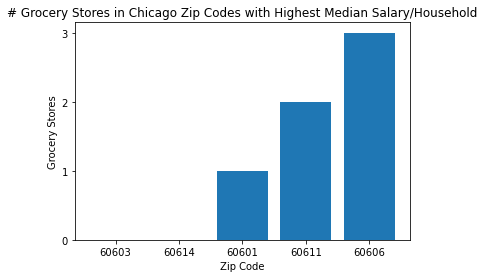

In [1174]:
xbar3=['60603','60614','60601','60611','60606']


ybar3=['0','0','1','2','3']
plt.bar(xbar3, ybar3)
plt.title('# Grocery Stores in Chicago Zip Codes with Highest Median Salary/Household')
plt.xlabel('Zip Code')
plt.ylabel('Grocery Stores')
plt.show()

In [659]:
# test
n=50
cluster0.loc[n,'latitude']

41.883067

In [678]:
def memofctn2(): 
    myvar9 = myvar6 + myvar7 + 1000

In [691]:
# test
myvar5= [50, 51, 52, 53, 54]
a_variable = {}
for n in myvar5:
    myvar6=cluster0.loc[n,'latitude']
    myvar7=cluster0.loc[n,'longitude']
    myvar8=myvar6+myvar7
    a_variable["VAR%s" %n] = "abc"
    print(myvar6, myvar7, myvar8)


41.883067 -87.629187 -45.746120000000005
41.780673 -87.6035 -45.822827
41.880048 -87.722352 -45.842304
41.776404 -87.640058 -45.863654
41.819722 -87.611809 -45.792086999999995


In [936]:
# test2

def memofctn2(varvar): 
    varsum=varlat+varlong
    
   


#for odd in range(1,5):
  
    #print(varlat)
    #print(varlong)
    
    #print(varvar)
   
    

    
myvar5= [50, 51, 52, 53, 54]


for n in myvar5:
    #d=0
    varlat=cluster0.loc[n,'latitude']
    varlong=cluster0.loc[n,'longitude']
    #myvar8=myvar6+myvar7
    #d=d+varlat-10
    #memofctn2(varlat, varlong)
    
    #varvar.append[varlat+10]
    #memofctn2(varvar)
    #results53 = requests.get(varzero).json()
    
    
    
    #memofctn2(myvar7)
    #print(myvar6, myvar7, varvar)
    print(varvar)
    

    
#varzero # display URL
    


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
#temp holder
var4sq = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    varlat, 
    varlong, 
    radius, 
    LIMIT)

In [904]:
xr

[50, 51, 52, 53, 54]

In [884]:
def my_function(food):
  for x in food:
    print(x)

fruits = ["apple", "banana", "cherry"]

my_function(fruits)

apple
banana
cherry


In [885]:
def my_function(x):
  return 5 * x

print(my_function(3))
print(my_function(5))
print(my_function(9))

15
25
45


In [767]:
d(x0)

NameError: name 'x0' is not defined

In [711]:
#Temp holder

vararg = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    arglat, 
    arglong, 
    radius, 
    LIMIT)
#varzero # display URL
    resultsarg = requests.get(vararg).json()

foo
{'a': 1, 'b': 2}
1


In [736]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
    print(x[i])

0
1
2
3
4
5
6
7
8
9


In [745]:
d = {}
for i in range( 10 ):
    d[ "x" + str( i ) ] = i

print(d)

# -> {'x8': 8, 'x9': 9, 'x2': 2, 'x3': 3, 'x0': 0, 'x1': 1, 'x6': 6, 'x7': 7, 'x4': 4, 'x5': 5}

# then you can just use the value from the dictionary like this

print(d[ "x5" ])
# -> 5

{'x0': 0, 'x1': 1, 'x2': 2, 'x3': 3, 'x4': 4, 'x5': 5, 'x6': 6, 'x7': 7, 'x8': 8, 'x9': 9}
5


TypeError: 'dict' object is not callable